## Minimal Linear Regression Regressor Implementation

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.base import BaseEstimator

In [3]:
class LinearRegression(BaseEstimator):
        
    def __init__(self, alpha, max_iter):
        self.alpha = alpha
        self.max_iter = max_iter
    

    def fit(self, X, y):
        assert X.shape[0] == y.shape[0]
        m = X.shape[0]
        
        self.loss_ = np.zeros(self.max_iter)
        self.features_num_ = X.shape[1]
        self.weights_ = np.zeros(self.features_num_)
        self.bias_ = 0.
        
        for i in range(self.max_iter):
            prediction = (X @ self.weights_) + self.bias_
            diff = prediction - y
            
            self.loss_[i] = (diff ** 2).sum() / (2 * m)  # diff ** 2 == (-diff) ** 2
            
            dw = (diff @ X)  / m
            db = diff.sum() / m
            
            self.weights_ -= self.alpha * dw
            self.bias_ -= self.alpha * db
            
        
    def predict(self, X):
        assert X.shape[1] == self.features_num_
        
        return (X @ self.weights_) + self.bias_

In [4]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=50_000, n_features=25, n_informative=10, noise=75)

In [5]:
est = LinearRegression(alpha=0.1, max_iter=100)
est.fit(X, y)

In [6]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y, est.predict(X))

0.8900843454402771

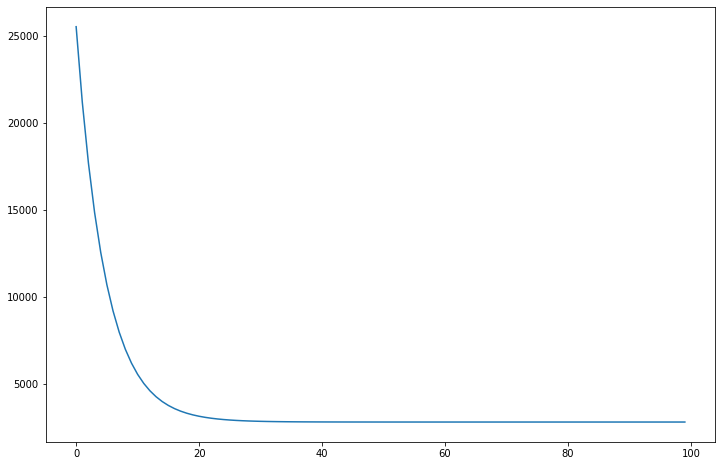

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
plt.plot(est.loss_);

In [8]:
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(alpha=0.1, max_iter=100), X, y, scoring='explained_variance', cv=10).mean()

0.8899661444346758

In [9]:
from sklearn.linear_model import LinearRegression as sk_est
cross_val_score(sk_est(), X, y, scoring='explained_variance', cv=10).mean()

0.8899661506108952